In [1]:
import cf_xarray
import gribberish
import xarray as xr

## Reading a Dataset

The `gribberish` engine can be used to read a grib2 file into a dataset.

In [2]:
ds = xr.open_dataset('gfswave.20210826.t12z.atlocn.0p16.f000.grib2', engine='gribberish')
ds

/Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'rasterio' loading failed:
dlopen(/Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so, 0x0002): Library not loaded: /opt/homebrew/opt/gdal/lib/libgdal.31.dylib
  Referenced from: <096C1844-80F2-3F2D-82B6-4FA692E96B85> /Users/matthewiannucci/Developer/gribberish/python/examples/env/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so
  Reason: tried: '/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/opt/homebrew/opt/gdal/lib/libgdal.31.dylib' (no such file), '/usr/local/lib/libgdal.31.dylib' (no such file), '/usr/lib/libgdal.31.dylib' (no such file, not in dyld cache), '/opt/homebrew/Cellar/gdal/3.6.2/lib/libgdal.31.dylib' (no such file), '/S

ValueError: Could not convert tuple of form (dims, data[, attrs, encoding]): (['time', 'lat', 'lon'], array([[nan, nan, nan, ..., nan, nan, nan]]), {'standard_name': 'SWPER', 'long_name': 'swellmeanperiod', 'units': 's', 'crs': 'EPSG:4326'}) to Variable.

 ...]

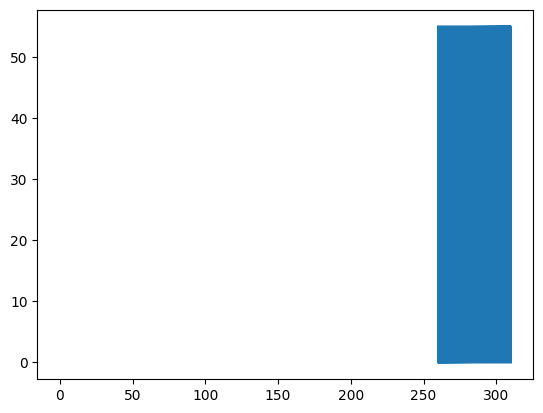

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# ds["HTSGW@groundorwater_1&2021-08-26T12:00:00+00:00"].plot()
plt.plot(ds.lon, ds.lat, ds["HTSGW@groundorwater_1&2021-08-26T12:00:00+00:00"])

# Projection

The `crs` attribute is set for each variable in the dataset, meaning it can be picked up by [`rioxarray`](https://corteva.github.io/rioxarray/stable/index.html). 

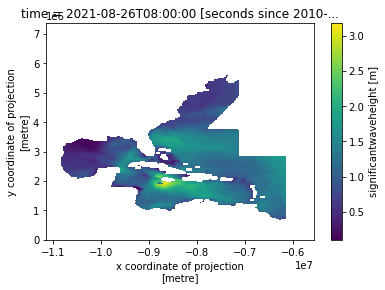

In [9]:
from rasterio.enums import Resampling

ds = ds.rio.reproject('EPSG:3857', resampling=Resampling.bilinear)
ds['HTSGW'].plot()